## Streaming Viewing Habits

In [70]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [71]:
# Add cleaned dataframes from other notebooks
%store -r hulu_cleaned
%store -r netflix_cleaned
%store -r prime_video_cleaned
%store -r imdb_cleaned

In [72]:
# Setup theme
PALETTE = 'magma'
sns.set_theme(style="white")

plt.rcParams["font.family"] = "monospace"

In [73]:
streaming_list = [hulu_cleaned, netflix_cleaned, prime_video_cleaned]
streaming_combined = pd.concat(streaming_list)

streaming_combined.head(-5)

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu
...,...,...,...
1860,Link into the VRAINS-Yu-Gi-Oh! VRAINS,10/10/2022 8:00:00,Prime Video
1861,Seize the Wind!-Yu-Gi-Oh! VRAINS,10/10/2022 9:00:00,Prime Video
1862,Contact-Yu-Gi-Oh! VRAINS,10/10/2022 9:00:00,Prime Video
1863,Pain and Gain-Yu-Gi-Oh! VRAINS,10/10/2022 9:00:00,Prime Video


In [74]:
top_titles = streaming_combined.Title.value_counts()

top_titles.head(10)

Them Idiots! Whirled Tour                                                     66
Home Improvement                                                              52
NullCompleteVideo                                                             44
Larry the Cable Guy: Tailgate Party                                           34
Top Gear: Series 22: Episode 5                                                32
Rodney Carrington: Laughter’s Good                                            30
Jeff Dunham: Relative Disaster                                                30
White Collar: Season 1: Pilot (Episode 1)                                     30
Sherlock: Series 1: A Study in Pink (Episode 1)                               30
Yu-Gi-Oh!: Season 1: Best of Friends Best of Duelists: Part 1 (Episode 33)    25
Name: Title, dtype: int64

In [75]:
data_combined = pd.merge(streaming_combined, imdb_cleaned, how="inner", on="Title")

data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score
0,Dark Shadows,10/19/2022 19:51,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2
1,Dark Shadows,10/27/2012 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
2,Dark Shadows,11/04/2012 3:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
3,Dark Shadows,11/04/2012 3:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
4,Dark Shadows,11/04/2012 4:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2


In [76]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              520 non-null    object 
 1   Date Watched       547 non-null    object 
 2   Streaming Service  554 non-null    object 
 3   Release Year       554 non-null    int64  
 4   Runtime            554 non-null    int64  
 5   Genres             554 non-null    object 
 6   Imdb Score         501 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 34.6+ KB


In [77]:
# Convert "Date Watched" column from string to datetime 
data_combined["Date Watched"] = data_combined["Date Watched"].apply(pd.to_datetime)

data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              520 non-null    object        
 1   Date Watched       547 non-null    datetime64[ns]
 2   Streaming Service  554 non-null    object        
 3   Release Year       554 non-null    int64         
 4   Runtime            554 non-null    int64         
 5   Genres             554 non-null    object        
 6   Imdb Score         501 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 34.6+ KB


In [78]:
# Add a new column "Month Watched" that gets the month the show or movie was watched from the "Date Watched" column
data_combined["Month Watched"] = data_combined["Date Watched"].dt.month_name()

data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November


In [79]:
# efficient way to extract year from string format date
data_combined['Year Watched'] = pd.DatetimeIndex(data_combined['Date Watched']).year
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0


In [80]:
top_services = data_combined[["Streaming Service"]].value_counts()

top_services

Streaming Service
Netflix              490
Prime Video           44
Hulu                  20
dtype: int64

In [81]:
top_genres = data_combined.Genres.value_counts()

top_genres.head()

['comedy']                     90
['documentation']              37
['romance', 'comedy']          35
['comedy', 'documentation']    35
[]                             34
Name: Genres, dtype: int64

In [82]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

# Parse genre column
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row

data_combined.Genres = data_combined.Genres.map(get_genres)
genres

{'comedy': 326,
 'fantasy': 76,
 'horror': 11,
 '': 33,
 'drama': 182,
 'romance': 147,
 'scifi': 28,
 'action': 38,
 'family': 80,
 'animation': 53,
 'music': 34,
 'reality': 0,
 'history': 6,
 'european': 6,
 'crime': 56,
 'documentation': 127,
 'thriller': 39,
 'sport': 22,
 'western': 2}

In [83]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'

In [84]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

# Perform the transformation
data_combined["Genre"] = data_combined.Genres.map(transform_genres)
data_combined['Genre'].value_counts()

comedy           204
drama             71
documentation     70
romance           63
none              34
animation         28
crime             25
scifi             13
family             9
music              9
fantasy            8
action             7
thriller           6
western            3
horror             3
history            1
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='Count'>

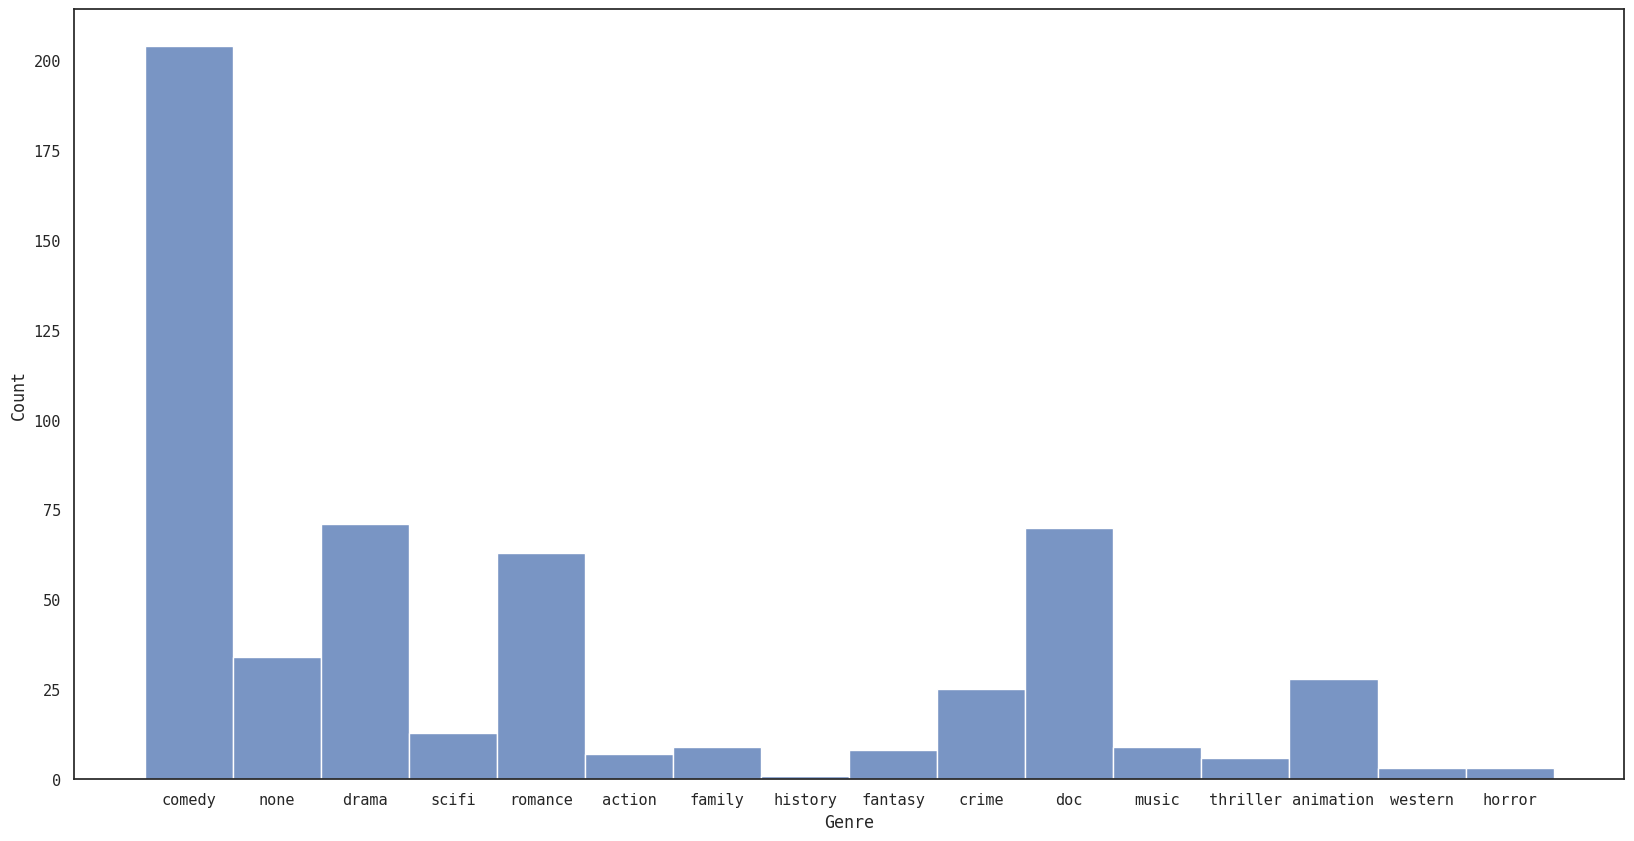

In [85]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

data_combined.Genre.replace(to_replace='documentation', value='doc', inplace=True)
plt.figure(figsize=(20,10))
sns.histplot(data_combined.Genre)

In [86]:
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy


In [87]:
top_titles = data_combined.Title.value_counts().head()

top_titles

Jeff Dunham: Relative Disaster             30
Katt Williams: Great America               23
Pinkfong & Baby Shark's Space Adventure    13
Grey's Anatomy                             11
Someone Great                              10
Name: Title, dtype: int64

In [88]:
# convert series back to dataframe for visualisation 
titles_counts = pd.DataFrame({'Title': top_titles.index, 'counts': top_titles.values})

titles_counts

,Title,counts
0,Jeff Dunham: Relative Disaster,30
1,Katt Williams: Great America,23
2,Pinkfong & Baby Shark's Space Adventure,13
3,Grey's Anatomy,11
4,Someone Great,10


In [89]:
# Group the release year by decade
def get_decade(val):
    return int(str(val)[0:-1] + "0")

data_combined["Decade"] = data_combined["Release Year"].map(get_decade)
data_combined["Decade"].value_counts()

2010    310
2020    193
2000     32
1990     18
1950      1
Name: Decade, dtype: int64

In [90]:
data_combined["Date Watched"] = pd.to_datetime(data_combined["Date Watched"], utc=True)

In [91]:
data_combined = data_combined.set_index("Date Watched")

In [92]:
data_combined.index = data_combined.index.tz_convert('America/New_York')

In [93]:
data_combined = data_combined.reset_index()

In [94]:
data_combined["Day Watched"] = data_combined["Date Watched"].dt.weekday
data_combined["Hour Watched"] = data_combined["Date Watched"].dt.hour

In [95]:
data_combined.head()

,Date Watched,Title,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre,Decade,Day Watched,Hour Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy,2010,2.0,15.0
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy,2010,5.0,17.0
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5.0,23.0
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5.0,23.0
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,6.0,0.0


In [97]:
# set days Monday-Sunday
data_combined['Day Watched'] = pd.Categorical(data_combined['Day Watched'], categories=[0,1,2,3,4,5,6], ordered=True)

In [98]:
# create data per day and sort by day using sort_index function
watch_per_day = data_combined['Day Watched'].value_counts().sort_index()

watch_per_day

0     66
1     74
2     57
3     59
4     61
5    126
6    104
Name: Day Watched, dtype: int64

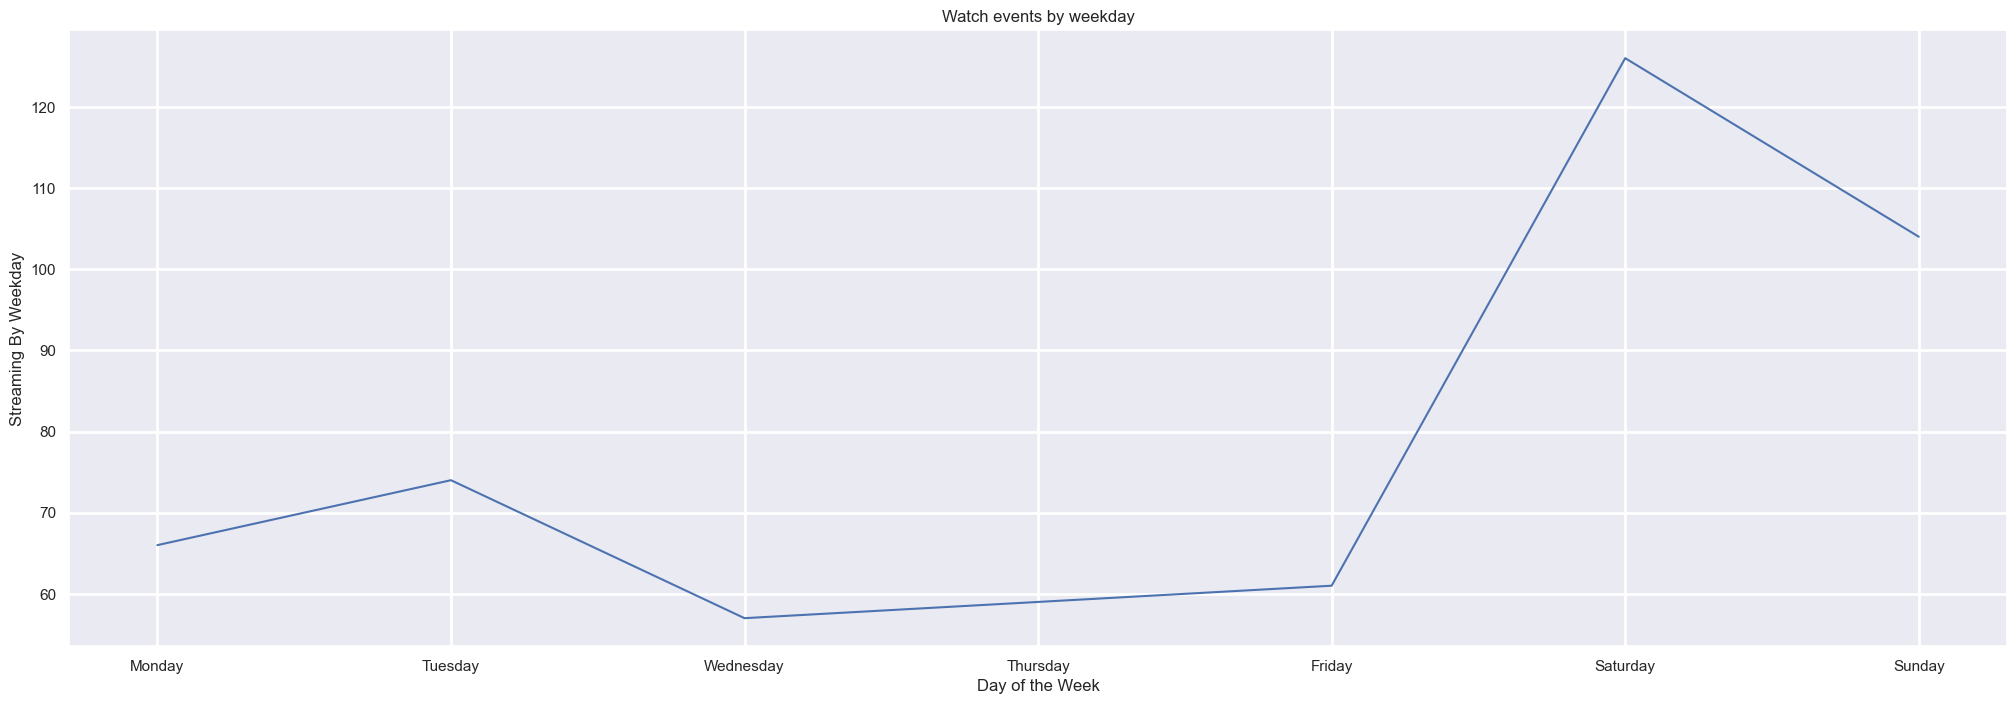

<Figure size 640x480 with 0 Axes>

In [102]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

plt.plot(watch_per_day)

days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.ylabel('Streaming By Weekday')
plt.xlabel('Day of the Week')
plt.xticks(ticks = range(7), labels=days_of_the_week)
plt.title('Watch events by weekday')

plt.show()
plt.clf()